In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
from sklearn.metrics import accuracy_score

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F

In [4]:
from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader
from torchvision.utils import make_grid

In [5]:
train_set = torchvision.datasets.CIFAR10(root="/kaggle/input/cifar10-python/", train=True, download=True, transform=transforms.ToTensor())
test_set = torchvision.datasets.CIFAR10(root="/kaggle/input/cifar10-python/", train=False, download=True, transform=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [6]:
train_set

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /kaggle/input/cifar10-python/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [7]:
len(train_set)

50000

In [8]:
test_set

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: /kaggle/input/cifar10-python/
    Split: Test
    StandardTransform
Transform: ToTensor()

In [10]:
len(test_set)

10000

In [11]:
batch_size=129

In [16]:
trainset, validateset = random_split(train_set, [45000, 5000])
train = DataLoader(trainset, batch_size, shuffle=True)
validate = DataLoader(validateset, batch_size, shuffle=True)
testLoader = DataLoader(test_set, batch_size, shuffle=False)

In [19]:
class_items=( 'deer', 'dog','cat', 'truck','airplane', 'ship','automobile', 'bird', 'frog', 'horse')

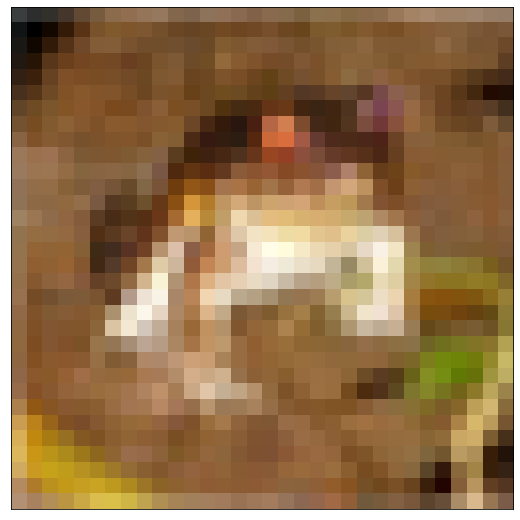

In [20]:
for images, labels in train_set:
    fig, ax = plt.subplots(figsize=(9,14))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images, nrow=20).permute(1, 2, 0))
    break

In [23]:
#creating model

In [31]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 32)        16416     
                                                                 
 flatten_6 (Flatten)         (None, 3872)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               495744    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      

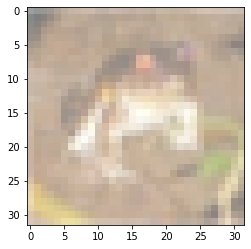

In [50]:
def imshow(img):
    img = img / 2 + 0.5     
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
dataiter = iter(train_set)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))

In [51]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 9, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(3, 120)
        self.fc2 = nn.Linear(12, 84)
        self.fc3 = nn.Linear(84, 10)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()

In [61]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(train_set, 0):
        inputs, labels = data
        optimizer.zero_grad()
        optimizer.step()

In [ ]:
def accuracy(self, outputs, labels):
        _, preds = torch.max(outputs, dim=1)
        return torch.tensor(torch.sum(preds == labels).item() / len(preds))

    def validationStep(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        accuracy = self.accuracy(out, labels)

        return {"loss": loss, "accuracy": accuracy}

In [38]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,                
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [41]:
img_width, img_height = 150, 150

In [46]:
#for evaluation

In [44]:
def evaluateModel(model, validationLoader):
    model.eval()
    out = [model.validationStep(batch) for batch in validationLoader]
    return model.validationEpochEnd(out)